In [1]:
import lightkurve as lk

def check_spoc_data(object_names_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    # Loop through each object name and check for SPOC reduced data
    for object_name in object_names:
        try:
            # Search for TESS data for the given object using SPOC pipeline
            search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) > 0:
                print(f"SPOC reduced data found for {object_name}.")
            else:
                print(f"No SPOC reduced data found for {object_name}.")
        except Exception as e:
            print(f"Error while searching for data for {object_name}: {str(e)}")
            continue

# Provide the path to the text file containing the list of object names
object_names_file = 'id.txt'
check_spoc_data(object_names_file)


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\USER\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\USER\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


SPOC reduced data found for PM J00118+2259.


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


SPOC reduced data found for PM J00162+1951W.


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


SPOC reduced data found for PM J00325+0729.


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


SPOC reduced data found for PM J01033+6221.


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


SPOC reduced data found for PM J01593+5831.


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
No data found for target "PM J02002+1303".
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3797676726.py:12: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')


No SPOC reduced data found for PM J02002+1303.



KeyboardInterrupt



In [ ]:
import lightkurve as lk

def check_spoc_data(object_names_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    # Loop through each object name and check for SPOC reduced data
    for object_name in object_names:
        try:
            # Search for TESS data for the given object using SPOC pipeline
            search_result = lk.search_lightcurve(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) > 0:
                print(f"SPOC reduced data found for {object_name}.")
            else:
                print(f"No SPOC reduced data found for {object_name}.")
        except Exception as e:
            print(f"Error while searching for data for {object_name}: {str(e)}")
            continue

# Provide the path to the text file containing the list of object names
object_names_file = '2mass id.txt'
check_spoc_data(object_names_file)


In [ ]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def find_rotation_period(object_names_file, output_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Loop through each object name and find the rotation period
    for object_name in object_names:
        try:
            # Search for TESS data for the given object using SPOC pipeline
            search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, object_name, '-', '-'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Append the result to the list
            results.append((s_no, object_name, lc_file.targetid, f"{rotation_period:.6f}"))
            s_no += 1

        except Exception as e:
            print(f"Error while processing {object_name}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'Object Name', 'TIC ID', 'Rotation Period (days)'])

    # Save the DataFrame as a PDF file
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='upper left')
    plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Provide the path to the text file containing the list of object names
object_names_file = 'id.txt'

# Provide the output file name for the PDF
output_file = 'table.pdf'

find_rotation_period(object_names_file, output_file)


In [ ]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def save_light_curve_plots(object_names_file, output_lc_plots_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    # Create a PDF file to save the light curve plots
    with PdfPages(output_lc_plots_file) as pdf:

        # Loop through each object name and save the light curve plot
        for object_name in object_names:
            try:
                # Search for TESS data for the given object using SPOC pipeline
                search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
                if len(search_result) == 0:
                    print(f"No SPOC reduced data found for {object_name}.")
                    continue

                # Download the light curve for the first available TESS data
                lc_file = search_result[0].download()
                lc = lc_file.PDCSAP_FLUX.remove_nans()

                # Create the light curve plot
                plt.figure(figsize=(10, 4))
                lc.plot()
                plt.title(f'Light Curve for {object_name}')
                plt.tight_layout()

                # Save the plot to the PDF
                pdf.savefig()
                plt.close()

            except Exception as e:
                print(f"Error while processing {object_name}: {str(e)}")
                continue

# Provide the path to the text file containing the list of object names
object_names_file = 'id.txt'

# Provide the output file name for the PDF containing the light curve plots
output_lc_plots_file = 'mdwarfs_plots.pdf'

save_light_curve_plots(object_names_file, output_lc_plots_file)


In [ ]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def save_light_curve_plots(object_names_file, output_lc_plots_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    # Create a PDF file to save the light curve plots
    with PdfPages(output_lc_plots_file) as pdf:

        # Loop through each object name and save the light curve plot
        for object_name in object_names:
            try:
                # Search for TESS data for the given object using SPOC pipeline
                search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
                if len(search_result) == 0:
                    print(f"No SPOC reduced data found for {object_name}.")
                    continue

                # Download the light curve for the first available TESS data
                lc_file = search_result[0].download()
                lc = lc_file.PDCSAP_FLUX.remove_nans()

                # Create the light curve plot
                plt.figure(figsize=(10, 4))
                lc.plot()
                plt.title(f'Light Curve for {object_name}')
                plt.tight_layout()

                # Save the plot to the PDF
                pdf.savefig()
                plt.close()

            except Exception as e:
                print(f"Error while processing {object_name}: {str(e)}")
                continue

# Provide the path to the text file containing the list of object names
object_names_file = '2mass id.txt'

# Provide the output file name for the PDF containing the light curve plots
output_lc_plots_file = 'IC348_plots.pdf'

save_light_curve_plots(object_names_file, output_lc_plots_file)


In [ ]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def find_rotation_period(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Loop through each TIC ID and find the rotation period
    for tic_id in tic_ids:
        try:
            # Search for TESS data for the given TIC ID using SPOC pipeline
            search_result = lk.search_lightcurvefile('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, tic_id, '-'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Append the result to the list
            results.append((s_no, tic_id, f"{rotation_period:.6f}"))
            s_no += 1

        except Exception as e:
            print(f"Error while processing TIC {tic_id}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)'])

    # Save the DataFrame as a PDF file
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='upper left')
    plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'tic_ids.txt'

# Provide the output file name for the PDF
output_file = 'ic348_periods.pdf'

find_rotation_period(tic_ids_file, output_file)


In [ ]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def find_rotation_period(object_names_file, output_file):
    # Read object names from the input text file
    with open(object_names_file, 'r') as f:
        object_names = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Loop through each object name and find the rotation period
    for object_name in object_names:
        try:
            # Search for TESS data for the given object using SPOC pipeline
            search_result = lk.search_lightcurvefile(object_name, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, object_name, '-', '-'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Append the result to the list
            results.append((s_no, object_name, lc_file.targetid, f"{rotation_period:.6f}"))
            s_no += 1

        except Exception as e:
            print(f"Error while processing {object_name}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'Object Name', 'TIC ID', 'Rotation Period (days)'])

    # Save the DataFrame as a PDF file
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='upper left')
    plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Provide the path to the text file containing the list of object names
object_names_file = '2mass id.txt'

# Provide the output file name for the PDF
output_file = 'table_ic348.pdf'

find_rotation_period(object_names_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3250886006.py:27: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3250886006.py:27: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3250886006.py:27: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3250886006.py:27: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\3250886006.py:27: LightkurveDeprecationWarning: The PDCSAP_FLUX function is depreca

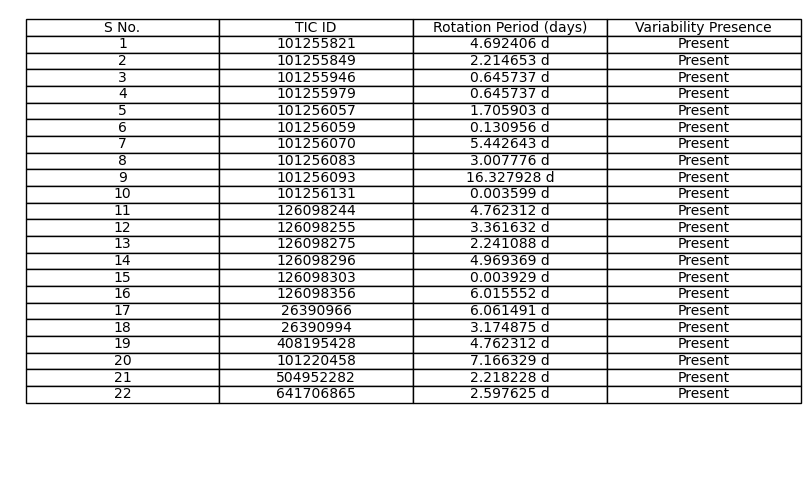

In [22]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u

def find_rotation_period(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Loop through each TIC ID and find the rotation period
    for tic_id in tic_ids:
        try:
            # Search for TESS data for the given TIC ID using SPOC pipeline
            search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, tic_id, '-', 'No Data'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
            threshold_power = 0.1 * u.dimensionless_unscaled

            # Determine variability presence using the threshold for Lomb-Scargle power
            variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

            # Append the result to the list
            results.append((s_no, tic_id, f"{rotation_period:.6f}", variability_presence))
            s_no += 1

        except Exception as e:
            print(f"Error while processing TIC {tic_id}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)', 'Variability Presence'])

    # Save the DataFrame as a PDF file
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='upper left')
    plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'tic_ids.txt'

# Provide the output file name for the PDF
output_file = 'rotation_variability.pdf'

find_rotation_period(tic_ids_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\1754750093.py:31: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\1754750093.py:66: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  phase_folded.bin(binsize=10).plot(color='red', lw=2)
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\1754750093.py:31: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\1754750093.py:66: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  phase_folded.bin(binsize=10).plot(color='red', lw=2)
C:\Users\USER\AppData\Local\

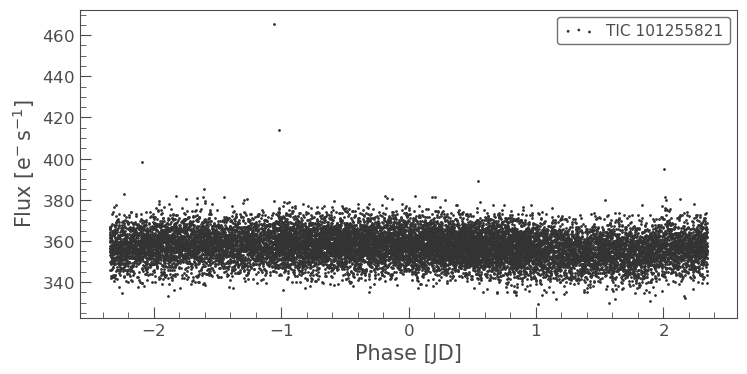

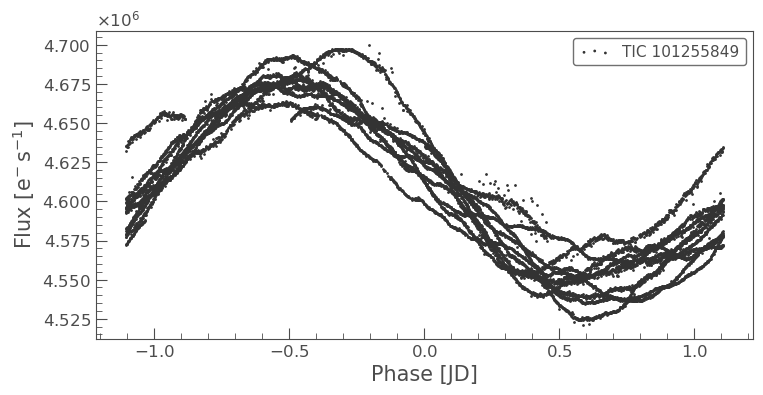

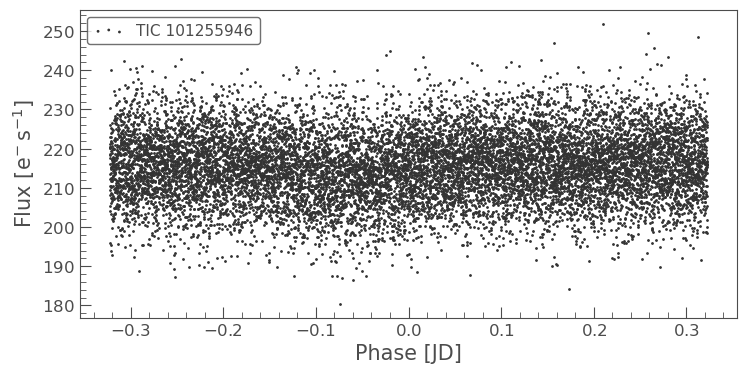

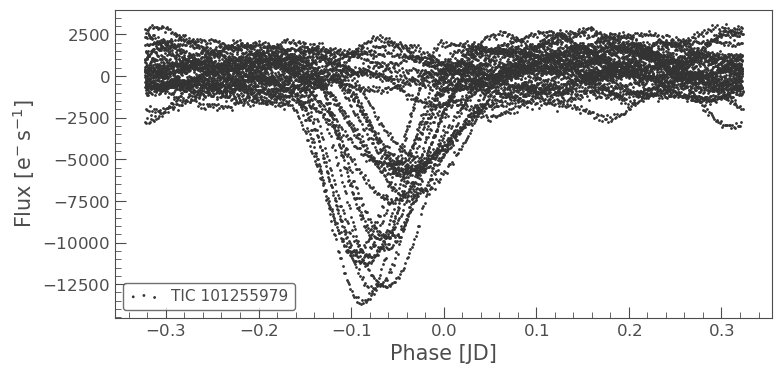

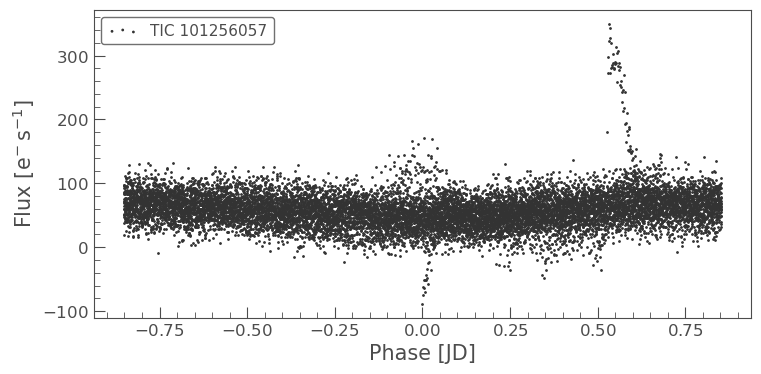

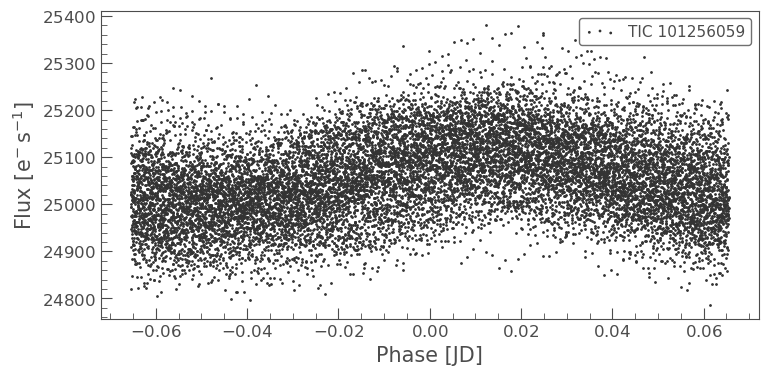

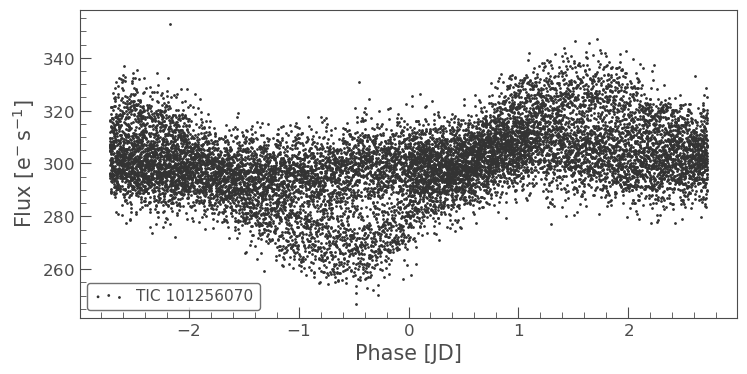

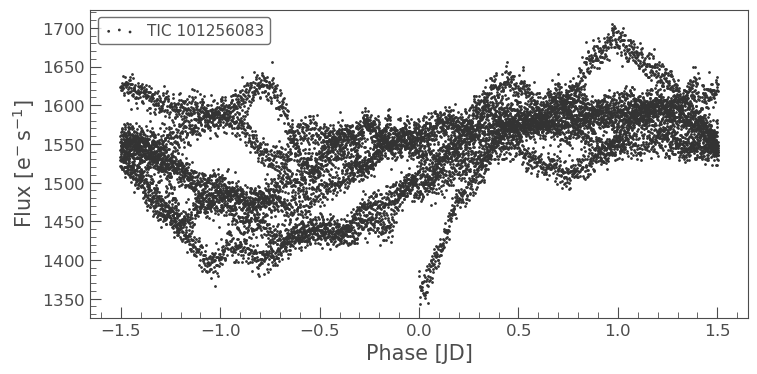

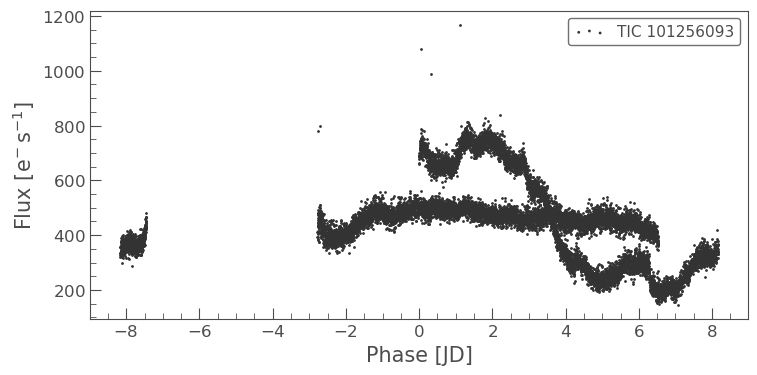

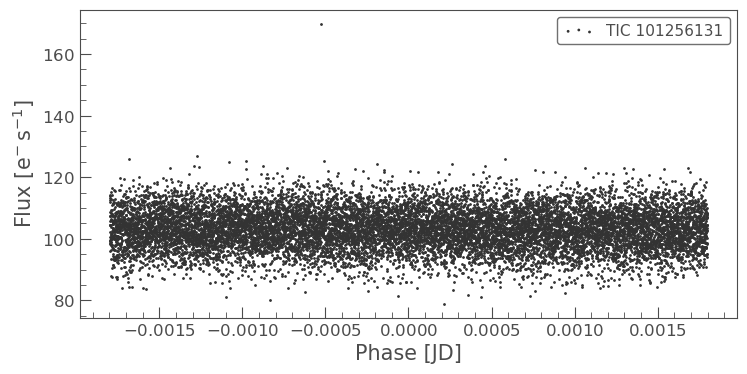

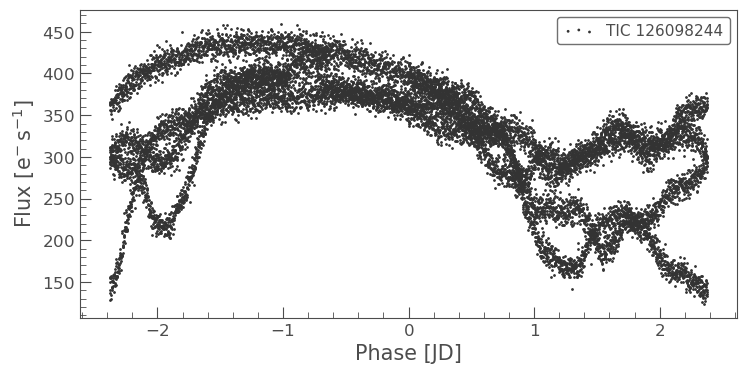

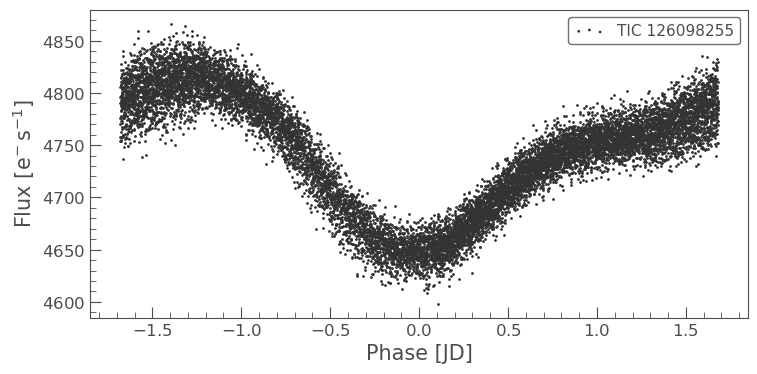

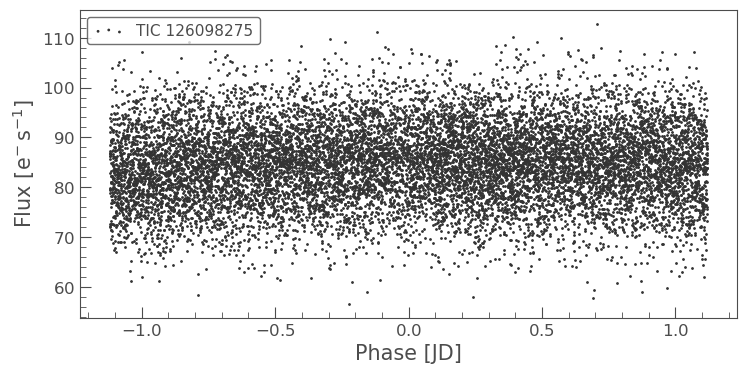

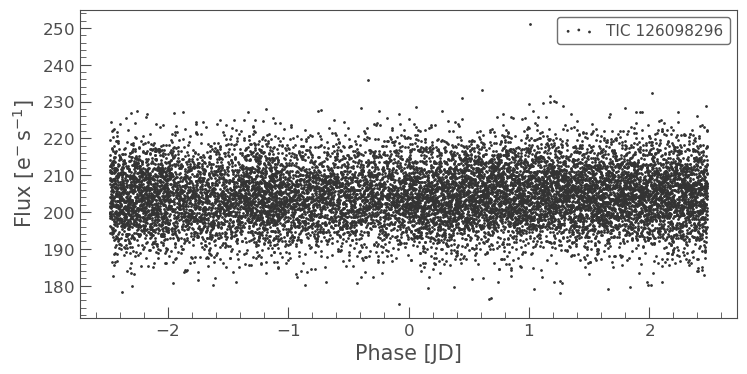

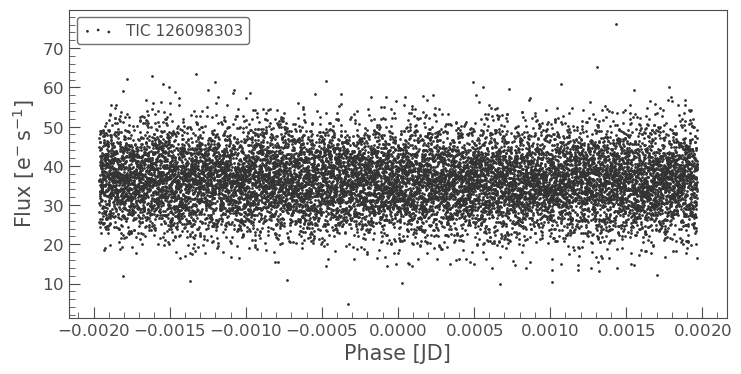

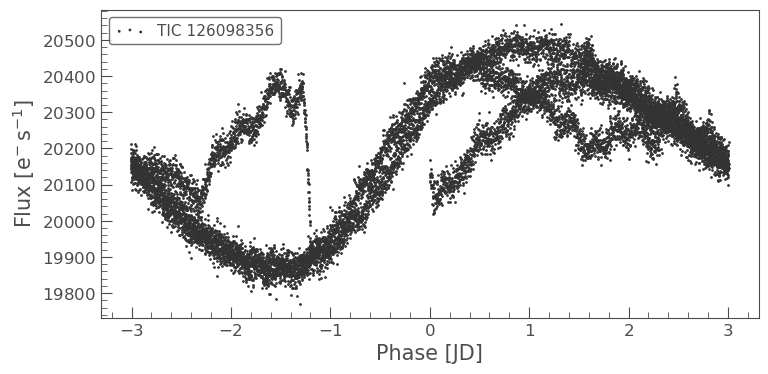

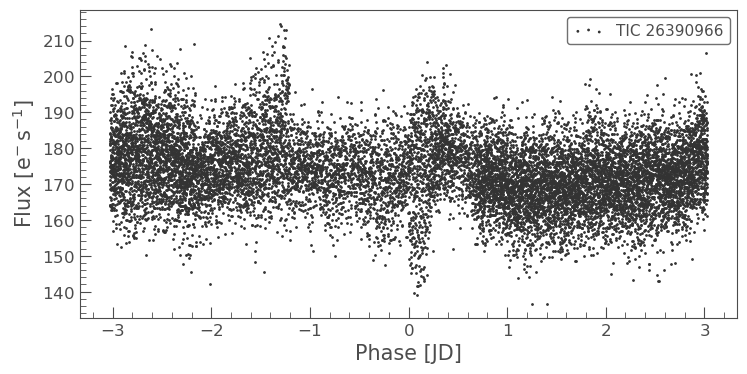

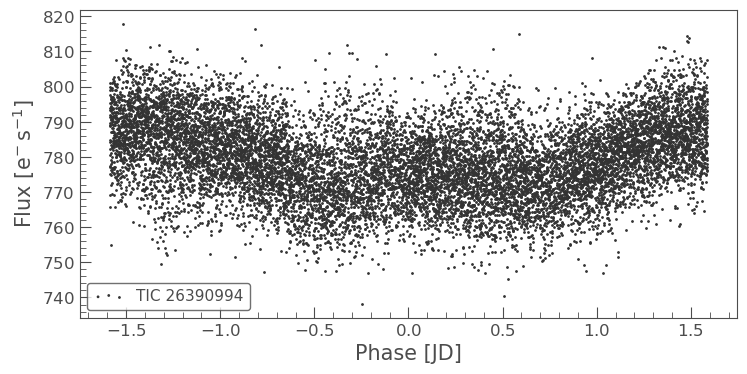

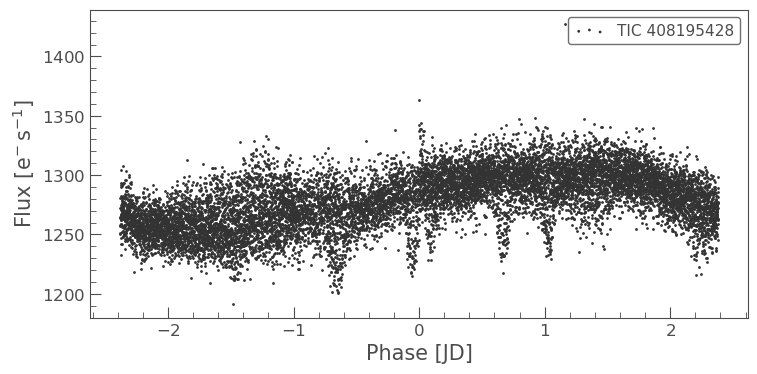

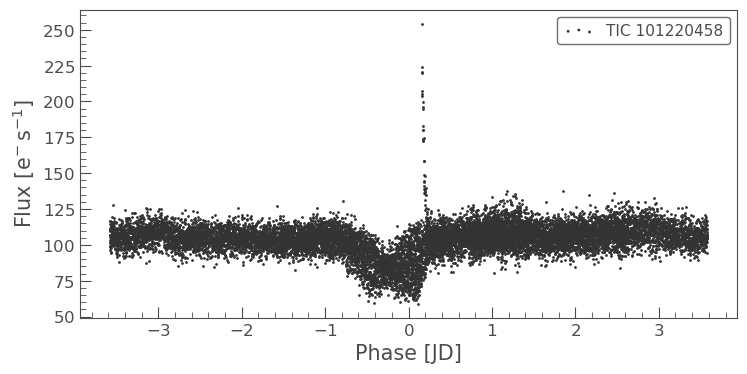

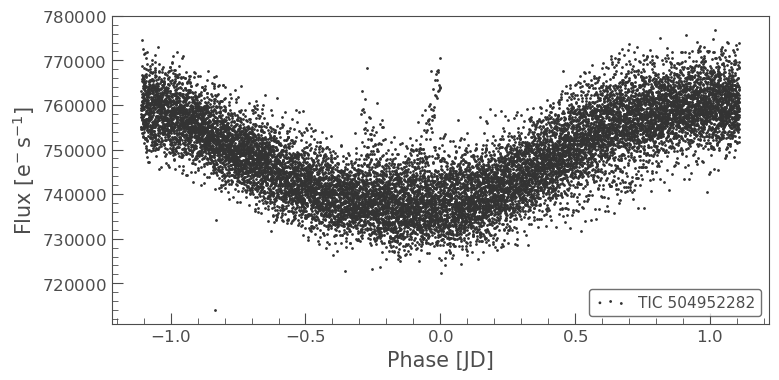

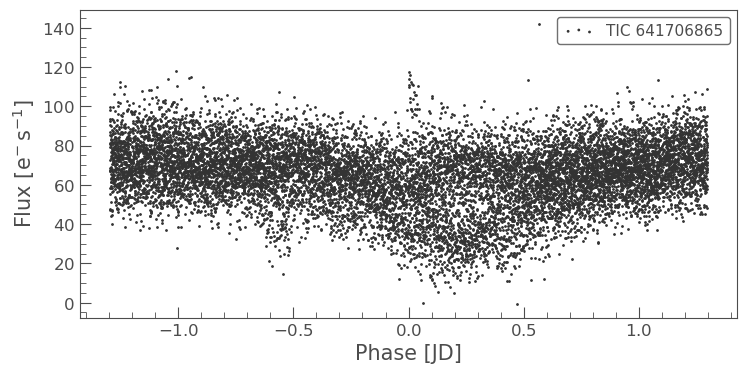

In [23]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy import units as u

def find_rotation_period(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Create a PDF to save all the plots
    with PdfPages(output_file) as pdf_pages:

        # Loop through each TIC ID and find the rotation period
        for tic_id in tic_ids:
            try:
                # Search for TESS data for the given TIC ID using SPOC pipeline
                search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
                if len(search_result) == 0:
                    results.append((s_no, tic_id, '-', 'No Data'))
                    s_no += 1
                    continue

                # Download the light curve for the first available TESS data
                lc_file = search_result[0].download()
                lc = lc_file.PDCSAP_FLUX.remove_nans()

                # Calculate the Lomb-Scargle periodogram
                ls_periodogram = lc.to_periodogram(method='lombscargle')

                # Get the Lomb-Scargle power and corresponding frequencies
                power = ls_periodogram.power
                frequencies = ls_periodogram.frequency

                # Convert frequencies to periods (in days)
                periods = 1 / frequencies

                # Find the rotation period corresponding to the highest peak in the periodogram
                rotation_period = periods[np.argmax(power)]

                # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
                threshold_power = 0.1 * u.dimensionless_unscaled

                # Determine variability presence using the threshold for Lomb-Scargle power
                variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

                # If variability is present, create the plots and save them in the PDF
                if variability_presence == 'Present':
                    # Create a periodogram plot
                    plt.figure(figsize=(8, 4))
                    plt.plot(periods, power, 'k')
                    plt.xlabel('Period (days)')
                    plt.ylabel('Lomb-Scargle Power')
                    plt.title(f'TIC {tic_id} - Lomb-Scargle Periodogram')
                    pdf_pages.savefig()
                    plt.close()

                    # Phase-fold and fit the light curve
                    phase_folded = lc.fold(period=rotation_period)
                    phase_folded.scatter()
                    phase_folded.bin(binsize=10).plot(color='red', lw=2)
                    plt.xlabel('Phase')
                    plt.ylabel('Flux')
                    plt.title(f'TIC {tic_id} - Phase-folded Light Curve (Period={rotation_period:.6f} days)')
                    pdf_pages.savefig()
                    plt.close()

                # Append the result to the list
                results.append((s_no, tic_id, f"{rotation_period:.6f}", variability_presence))
                s_no += 1

            except Exception as e:
                print(f"Error while processing TIC {tic_id}: {str(e)}")
                continue

        # Create a DataFrame from the results
        df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)', 'Variability Presence'])

        # Save the DataFrame as a table in the PDF
        plt.figure(figsize=(10, 6))
        plt.axis('off')
        plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
        pdf_pages.savefig()
        plt.close()

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'tic_ids.txt'

# Provide the output file name for the PDF
output_file = 'var_plots.pdf'

find_rotation_period(tic_ids_file, output_file)


In [30]:
import lightkurve as lk
import numpy as np
import pandas as pd
from astropy import units as u

def find_variability_type(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
    threshold_power = 0.1 * u.dimensionless_unscaled

    # Loop through each TIC ID and find the variability type
    for tic_id in tic_ids:
        try:
            # Search for TESS data for the given TIC ID using SPOC pipeline
            search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, tic_id, '-', 'No Data'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Determine variability presence using the threshold for Lomb-Scargle power
            variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

            #variability_presence = 'Present' if np.max(power) > threshold_power else 'Not Present'

            # Determine variability type based on the number of significant peaks in the periodogram
            num_peaks = np.sum(power.value > threshold_power.value)
            if num_peaks == 1:
                variability_type = 'Rotational Modulation'
            elif num_peaks > 1:
                variability_type = 'Eclipsing Binary or Pulsating Star'
            else:
                variability_type = 'Unclassified'

            # Append the result to the list
            results.append((s_no, tic_id, f"{rotation_period:.6f}", variability_presence, variability_type))
            s_no += 1

        except Exception as e:
            print(f"Error while processing TIC {tic_id}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)', 'Variability Presence', 'Variability Type'])

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'tic_ids.txt'

# Provide the output file name for the CSV
output_file = 'variability_types.csv'

find_variability_type(tic_ids_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\800387747.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\800387747.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\800387747.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\800387747.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\800387747.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated a

In [33]:
import lightkurve as lk
import numpy as np
import pandas as pd
from astropy import units as u

def find_variability_properties(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
    threshold_power = 0.1 * u.dimensionless_unscaled

    # Loop through each TIC ID and find the variability properties
    for tic_id in tic_ids:
        try:
            # Search for TESS data for the given TIC ID using SPOC pipeline
            search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, tic_id, '-', 'No Data', 'Unclassified', 'N/A', 'N/A', 'N/A'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_nans()

            # Calculate the Lomb-Scargle periodogram
            ls_periodogram = lc.to_periodogram(method='lombscargle')

            # Get the Lomb-Scargle power and corresponding frequencies
            power = ls_periodogram.power
            frequencies = ls_periodogram.frequency

            # Convert frequencies to periods (in days)
            periods = 1 / frequencies

            # Find the rotation period corresponding to the highest peak in the periodogram
            rotation_period = periods[np.argmax(power)]

            # Determine variability presence using the threshold for Lomb-Scargle power
            variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

            #variability_presence = 'Present' if np.max(power) > threshold_power else 'Not Present'

            # Determine variability type based on the number of significant peaks in the periodogram
            num_peaks = np.sum(power.value > threshold_power.value)
            if num_peaks == 1:
                variability_type = 'Rotational Modulation'
            elif num_peaks > 1:
                variability_type = 'Eclipsing Binary or Pulsating Star'
            else:
                variability_type = 'Unclassified'

            # Calculate the Signal-to-Noise Ratio (SNR) of the highest peak
            snr = np.max(power) / np.mean(power)

            # Calculate the variational amplitude in flux units
            variational_amplitude_flux = np.max(lc.flux) - np.min(lc.flux)

            # Convert the variational amplitude to magnitude units
            flux_zero_point = lc.flux.mean()
            amplitude_mag = -2.5 * np.log10(variational_amplitude_flux / flux_zero_point)

            # Calculate the Standard Deviation Ratio (SDR) to determine if variation is periodic
            folded_lc = lc.fold(period=rotation_period)
            sdr = folded_lc.flux.std() / lc.flux.std()

            # Append the result to the list
            results.append((s_no, tic_id, f"{rotation_period:.4f}", variability_presence, variability_type, f"{snr:.2f}", f"{amplitude_mag:.4f}", 'Periodic' if sdr > 1 else 'Aperiodic'))
            s_no += 1

        except Exception as e:
            print(f"Error while processing TIC {tic_id}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)', 'Variability Presence', 'Variability Type', 'SNR', 'Variational Amplitude (mag)', 'Variation Type'])

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'tic_ids.txt'

# Provide the output file name for the CSV
output_file = 'variability_properties.csv'

find_variability_properties(tic_ids_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_12440\2602454.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\2602454.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\2602454.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\AppData\Local\Temp\ipykernel_12440\2602454.py:29: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()
C:\Users\USER\anaconda3\lib\site-packages\astropy\utils\masked\core.py:827: RuntimeWarning: invalid value encountered in log10
  result = getatt

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\USER\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\USER\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\351837772.py:62: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\351837772.py:62: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\i

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

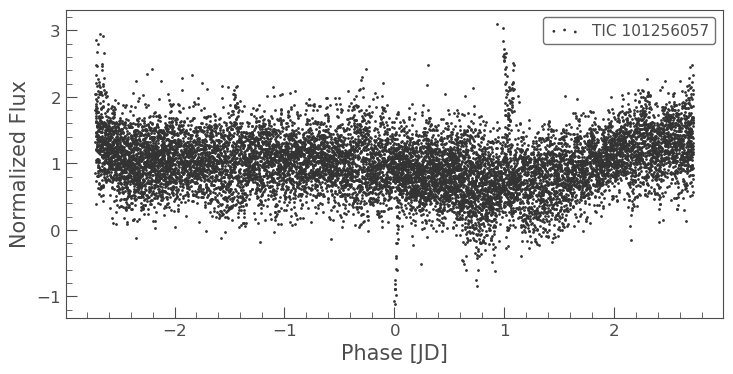

In [1]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy import units as u

def plot_lightcurve_power_spectrum(tic_id, lc, power, periods, rotation_period, pdf_pages):
    # Create a periodogram plot
    plt.figure(figsize=(8, 4))
    plt.plot(periods, power, 'k')
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.title(f'TIC {tic_id} - Lomb-Scargle Periodogram')
    plt.xlim(0, 20)  # Limit x-axis to 0-20 days
    pdf_pages.savefig()
    plt.close()

    # Create a light curve plot
    plt.figure(figsize=(6, 4))
    lc.scatter()
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')
    plt.title(f'TIC {tic_id} - Light Curve')
    pdf_pages.savefig()
    plt.close()

    # Create a phase-folded light curve plot
    phase_folded = lc.fold(period=rotation_period)
    plt.figure(figsize=(6, 4))
    phase_folded.scatter()
    phase_folded.bin(binsize=10).plot(color='red', lw=2)
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.title(f'TIC {tic_id} - Phase-folded Light Curve (Period={rotation_period:.6f} days)')
    pdf_pages.savefig()
    plt.close()

def find_rotation_period(tic_ids_file, output_file):
    # Read TIC IDs from the input text file
    with open(tic_ids_file, 'r') as f:
        tic_ids = [line.strip() for line in f]

    results = []  # List to store the results
    s_no = 1

    # Create a PDF to save all the plots
    with PdfPages(output_file) as pdf_pages:

        # Loop through each TIC ID and find the rotation period
        for tic_id in tic_ids:
            try:
                # Search for TESS data for the given TIC ID using SPOC pipeline
                search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
                if len(search_result) == 0:
                    results.append((s_no, tic_id, '-', 'No Data'))
                    s_no += 1
                    continue

                # Download the light curve for the first available TESS data
                lc_file = search_result[0].download()
                lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
                # Calculate the Lomb-Scargle periodogram
                ls_periodogram = lc.to_periodogram(method='lombscargle')

                # Get the Lomb-Scargle power and corresponding frequencies
                power = ls_periodogram.power
                frequencies = ls_periodogram.frequency

                # Convert frequencies to periods (in days)
                periods = 1 / frequencies

                # Find the rotation period corresponding to the highest peak in the periodogram
                rotation_period = periods[np.argmax(power)]

                # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
                threshold_power = 0.1 * u.dimensionless_unscaled

                # Determine variability presence using the threshold for Lomb-Scargle power
                variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

                # If variability is present, create the plots and save them in the PDF
                if variability_presence == 'Present':
                    plot_lightcurve_power_spectrum(tic_id, lc, power, periods, rotation_period, pdf_pages)

                # Append the result to the list
                results.append((s_no, tic_id, f"{rotation_period:.6f}", variability_presence))
                s_no += 1

            except Exception as e:
                print(f"Error while processing TIC {tic_id}: {str(e)}")
                continue

        # Create a DataFrame from the results
        df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Rotation Period (days)', 'Variability Presence'])

        # Save the DataFrame as a table in the PDF
        plt.figure(figsize=(10, 6))
        plt.axis('off')
        plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
        pdf_pages.savefig()
        plt.close()

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'md_ic348.txt'

# Provide the output file name for the PDF
output_file = 'md_ic348_plots.pdf'

find_rotation_period(tic_ids_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_11196\267676800.py:69: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\267676800.py:32: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  phase_folded.bin(binsize=10).plot(color='red', lw=2)
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\267676800.py:69: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\267676800.py:32: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  phase_folded.bin(binsize=

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

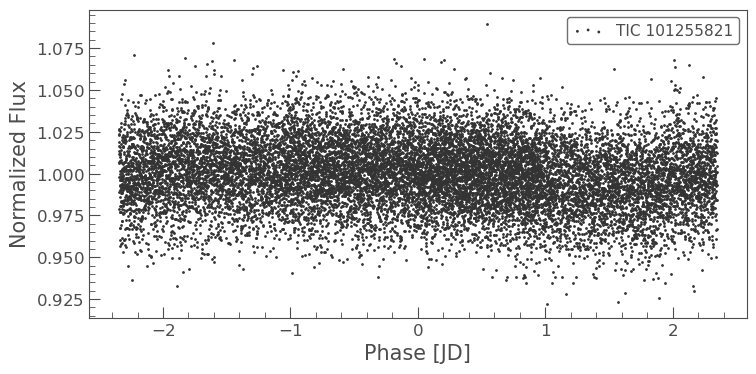

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

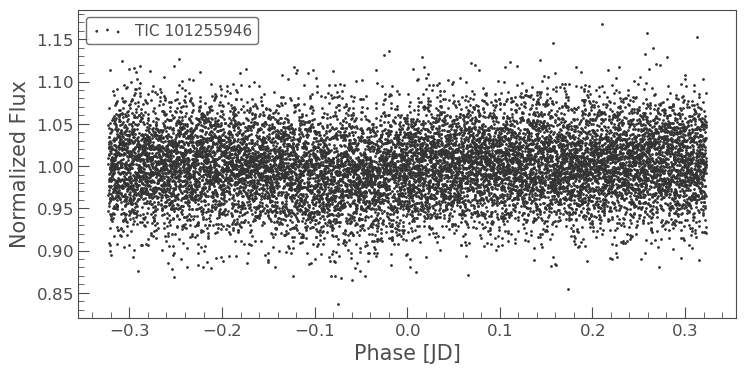

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

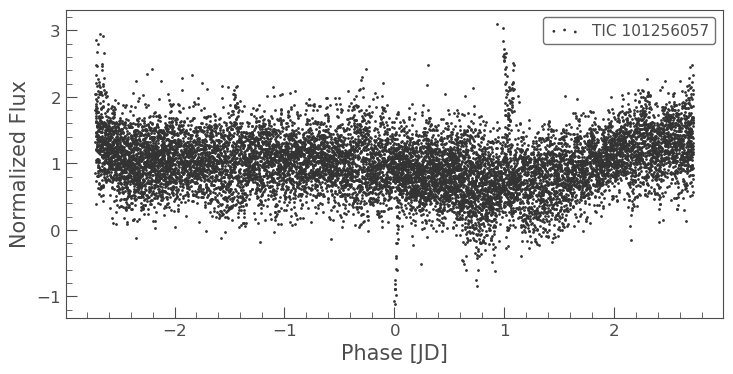

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

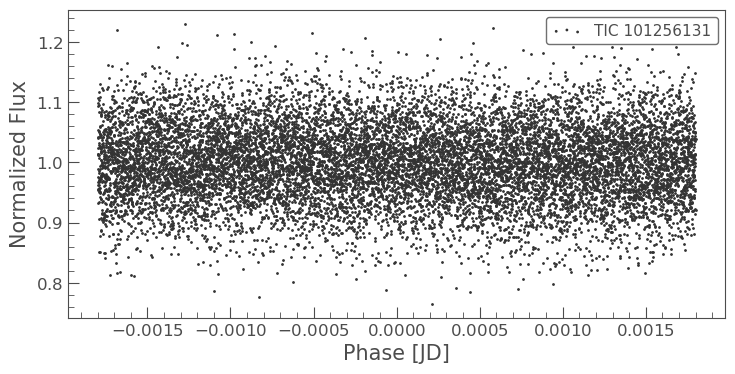

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

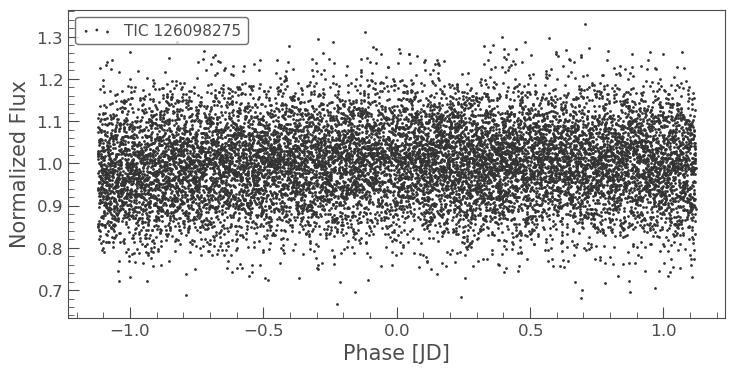

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

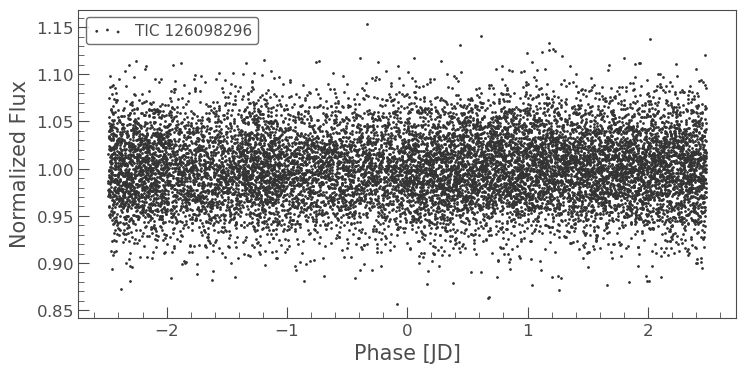

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

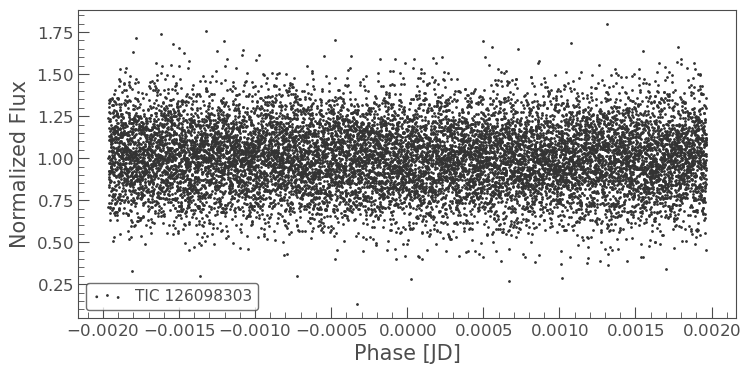

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

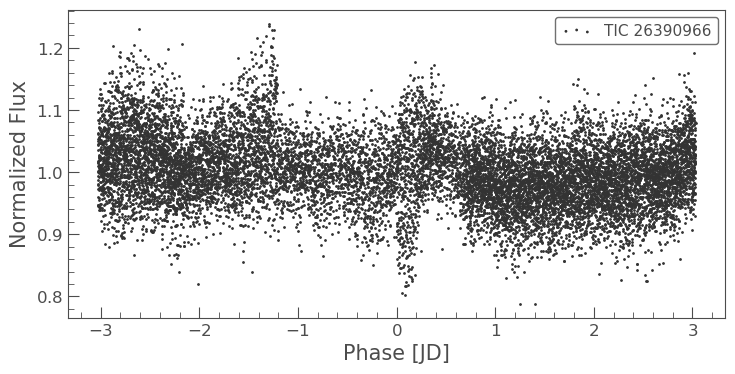

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

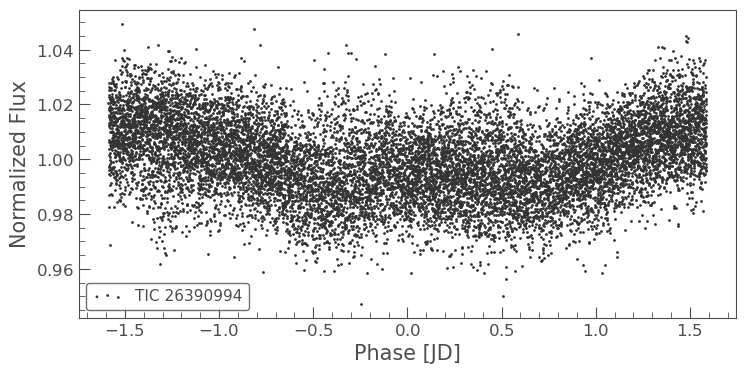

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

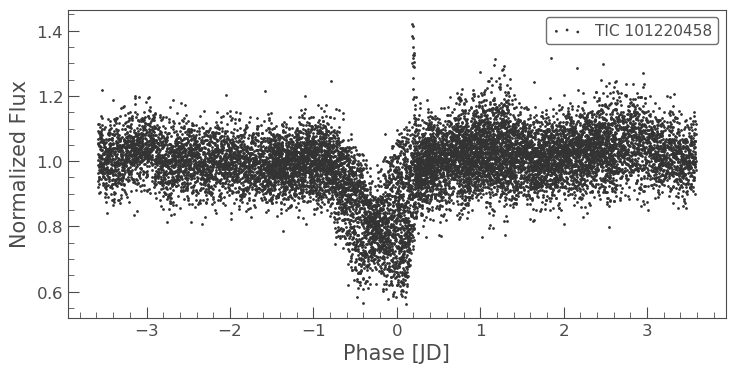

In [6]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy import units as u

def plot_lightcurve_power_spectrum(tic_id, lc, power, periods, rotation_period, pdf_pages):
    # Create a periodogram plot
    plt.figure(figsize=(8, 4))
    plt.plot(periods, power, 'k')
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.title(f'TIC {tic_id} - Lomb-Scargle Periodogram')
    plt.xlim(0, 20)  # Limit x-axis to 0-20 days
    pdf_pages.savefig()
    plt.close()

    # Create a light curve plot
    plt.figure(figsize=(6, 4))
    lc.scatter()
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')
    plt.title(f'TIC {tic_id} - Light Curve')
    pdf_pages.savefig()
    plt.close()

    # Create a phase-folded light curve plot
    phase_folded = lc.fold(period=rotation_period)
    plt.figure(figsize=(6, 4))
    phase_folded.scatter()
    phase_folded.bin(binsize=10).plot(color='red', lw=2)
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.title(f'TIC {tic_id} - Phase-folded Light Curve (Period={rotation_period:.6f} days)')
    pdf_pages.savefig()
    plt.close()
    
def find_rotation_period(tic_ids_file, output_file):
    # Read TIC IDs and spectral types from the input text file
    with open(tic_ids_file, 'r') as f:
        lines = f.readlines()

    tic_ids = []
    spectral_types = []
    for line in lines:
        tic_id, spectral_type = line.strip().split()
        tic_ids.append(tic_id)
        spectral_types.append(spectral_type)

    results = []  # List to store the results
    s_no = 1

    # Create a PDF to save all the plots
    with PdfPages(output_file) as pdf_pages:
        # ... (unchanged) ...

        for tic_id, spectral_type in zip(tic_ids, spectral_types):
            try:
                # Search for TESS data for the given TIC ID using SPOC pipeline
                search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
                if len(search_result) == 0:
                    results.append((s_no, tic_id, '-', 'No Data'))
                    s_no += 1
                    continue

                # Download the light curve for the first available TESS data
                lc_file = search_result[0].download()
                lc = lc_file.PDCSAP_FLUX.remove_outliers().remove_nans().normalize()
                # Calculate the Lomb-Scargle periodogram
                ls_periodogram = lc.to_periodogram(method='lombscargle')

                # Get the Lomb-Scargle power and corresponding frequencies
                power = ls_periodogram.power
                frequencies = ls_periodogram.frequency

                # Convert frequencies to periods (in days)
                periods = 1 / frequencies

                # Find the rotation period corresponding to the highest peak in the periodogram
                rotation_period = periods[np.argmax(power)]

                # Set the threshold value for Lomb-Scargle power as a dimensionless quantity
                threshold_power = 0.1 * u.dimensionless_unscaled

                # Determine variability presence using the threshold for Lomb-Scargle power
                variability_presence = 'Present' if np.max(power).value > threshold_power.value else 'Not Present'

                plot_lightcurve_power_spectrum(tic_id, lc, power, periods, rotation_period, pdf_pages)

                # Append the result to the list including the spectral type
                results.append((s_no, tic_id, spectral_type, f"{rotation_period:.6f}", variability_presence))
                s_no += 1

            except Exception as e:
                print(f"Error while processing TIC {tic_id}: {str(e)}")
                continue

        # Create a DataFrame from the results
        df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Spectral Type', 'Rotation Period (days)', 'Variability Presence'])

        # Save the DataFrame as a table in the PDF
        plt.figure(figsize=(10, 6))
        plt.axis('off')
        plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
        pdf_pages.savefig()
        plt.close()

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'md_ic348.txt'

# Provide the output file name for the PDF
output_file = 'md_ic348_plots.pdf'

find_rotation_period(tic_ids_file, output_file)


In [32]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u

def detect_flares(tic_ids_file, output_file):
    # Read TIC IDs and spectral types from the input text file
    with open(tic_ids_file, 'r') as f:
        lines = f.readlines()

    tic_ids = []
    spectral_types = []
    for line in lines:
        tic_id, spectral_type = line.strip().split()
        tic_ids.append(tic_id)
        spectral_types.append(spectral_type)

    results = []  # List to store the flare detection results
    s_no = 1

    for tic_id, spectral_type in zip(tic_ids, spectral_types):
        try:
            # Search for TESS data for the given TIC ID using SPOC pipeline
            search_result = lk.search_lightcurve('TIC ' + tic_id, mission='TESS', cadence='short', sector=None, author='SPOC')
            if len(search_result) == 0:
                results.append((s_no, tic_id, spectral_type, '-', '-', 'No Data'))
                s_no += 1
                continue

            # Download the light curve for the first available TESS data
            lc_file = search_result[0].download()
            lc = lc_file.PDCSAP_FLUX.remove_outliers()remove_nans().normalize()

            # Calculate the standard deviation of the normalized light curve
            threshold = np.std(lc.flux.value)

            # Detect flares based on threshold
            flare_indices = np.where(lc.flux.value > threshold)[0]
            flare_times = lc.time[flare_indices].value
            flare_fluxes = lc.flux[flare_indices].value
            flare_durations = np.diff(flare_times)
            flare_peak_fluxes = flare_fluxes[1:]

            # If no flares are detected, continue to the next object
            if len(flare_indices) == 0:
                results.append((s_no, tic_id, spectral_type, '-', '-', 'No Flares Detected'))
                s_no += 1
                continue

            # Append the results for each flare event to the list
            for i in range(len(flare_indices)-1):
                results.append((s_no, tic_id, spectral_type, flare_durations[i], flare_peak_fluxes[i], 'Flare Detected'))
                s_no += 1

        except Exception as e:
            print(f"Error while processing TIC {tic_id}: {str(e)}")
            continue

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['S No.', 'TIC ID', 'Spectral Type', 'Flare Duration (days)', 'Flare Peak Flux', 'Flare Status'])

    # Save the DataFrame as a table in the output CSV file
    df.to_csv(output_file, index=False)

# Provide the path to the text file containing the list of TIC IDs and spectral types
tic_ids_file = 'md_ic348.txt'

# Provide the output file name for the CSV
output_file = 'flare_detection_results.csv'

detect_flares(tic_ids_file, output_file)


C:\Users\USER\AppData\Local\Temp\ipykernel_11196\3395602546.py:33: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\3395602546.py:33: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\3395602546.py:33: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\3395602546.py:33: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans().normalize()
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\3395602546.py:33: LightkurveDepreca

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 101255821
Key Parameters:
Rotation Period: 4.796 d days
Flare Time: 2459477.849 (JD)
Flare Energy: 1.158e+00 (normalized flux)
Flare Duration: 1072271.789 s seconds (17871.20 minutes)


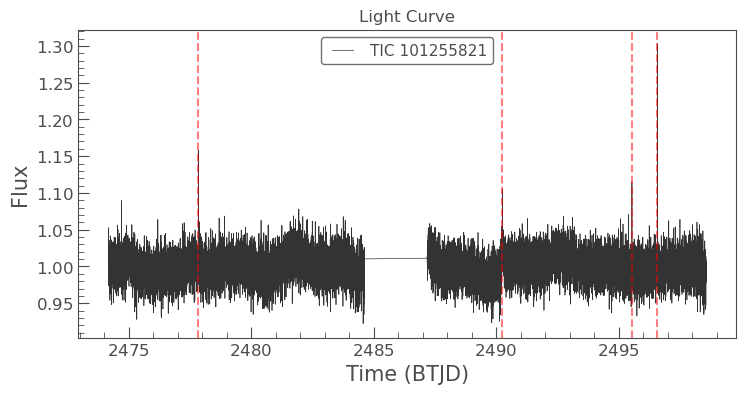

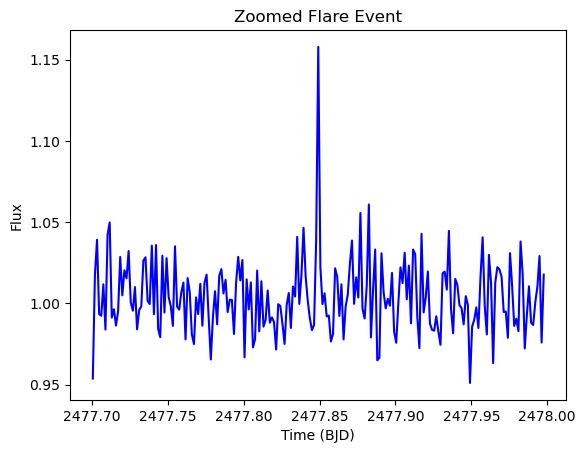

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 101255946
No flare events found.


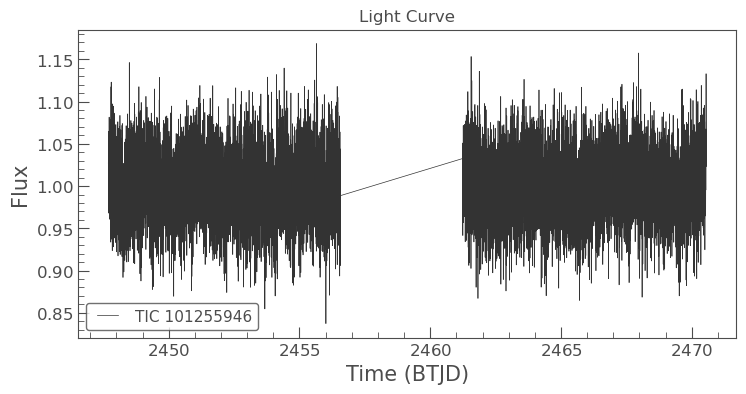

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 101256057
Key Parameters:
Rotation Period: 1.699 d days
Flare Time: 2459470.396 (JD)
Flare Energy: 4.678e+00 (normalized flux)
Flare Duration: 465.611 s seconds (7.76 minutes)


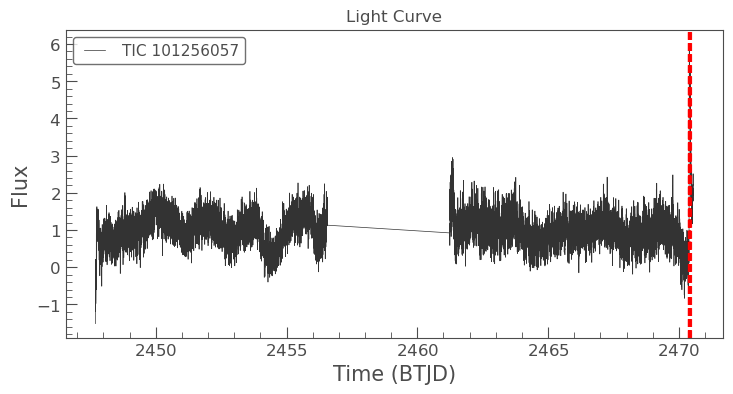

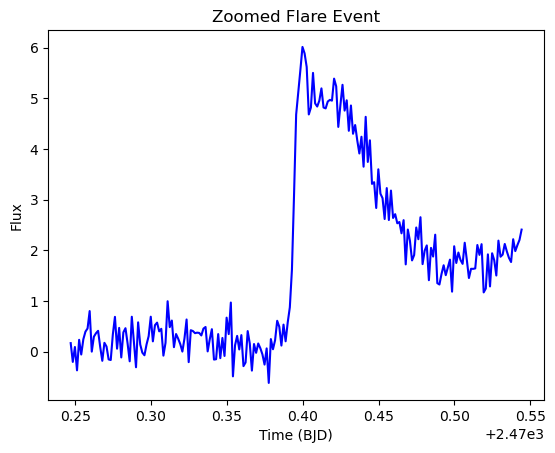

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 101256131
Error while processing TIC 101256131: list index out of range


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 126098275
No flare events found.


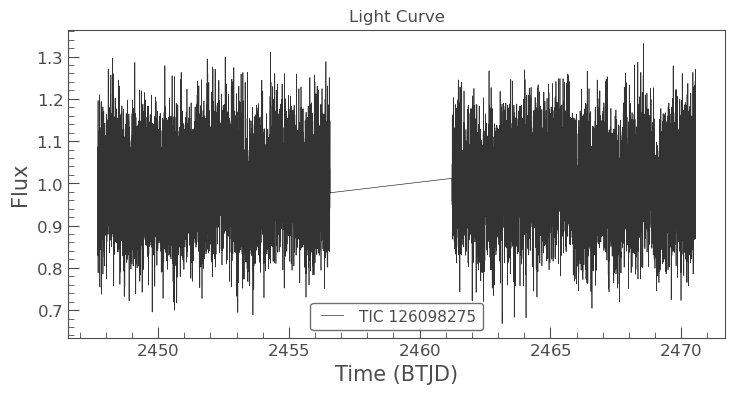

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(



TIC ID: 126098296
Error while processing TIC 126098296: list index out of range


C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 126098303
Error while processing TIC 126098303: list index out of range


C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 26390966
No flare events found.


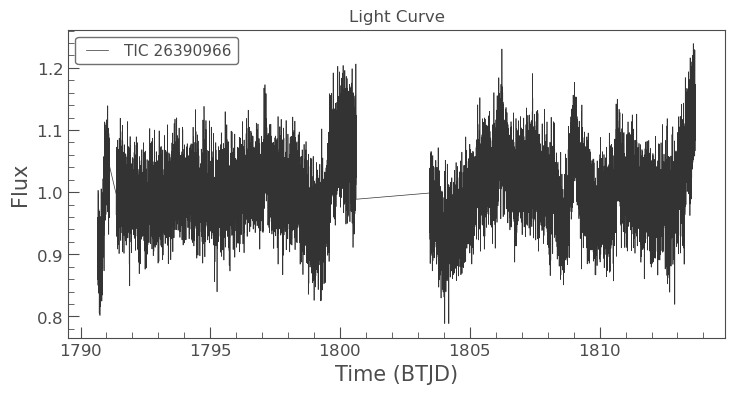

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 26390994
No flare events found.


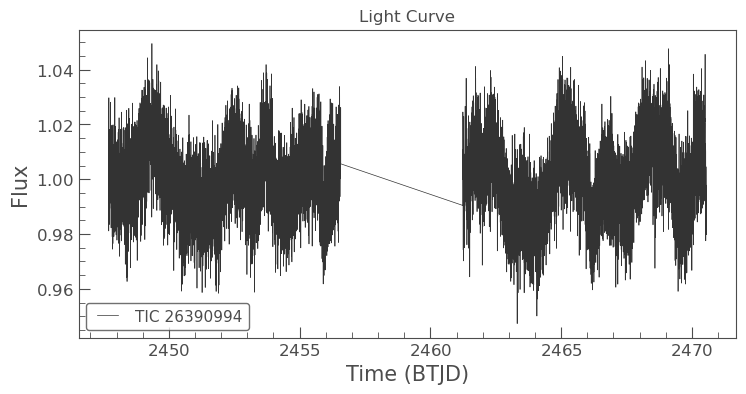

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_11196\1233563452.py:19: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX



TIC ID: 101220458
Key Parameters:
Rotation Period: 7.037 d days
Flare Time: 2458812.319 (JD)
Flare Energy: 2.140e+00 (normalized flux)
Flare Duration: 465.599 s seconds (7.76 minutes)


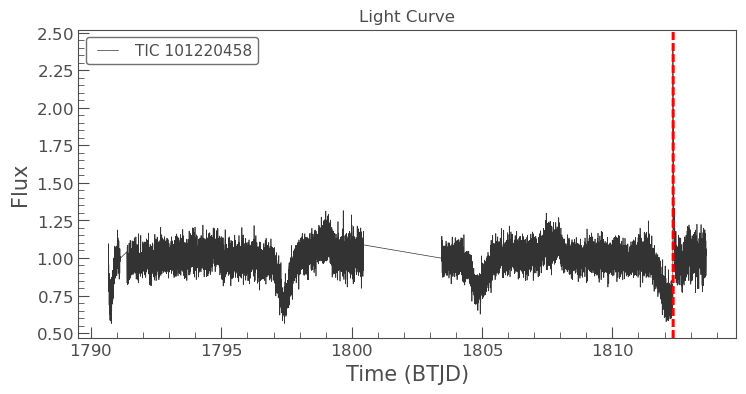

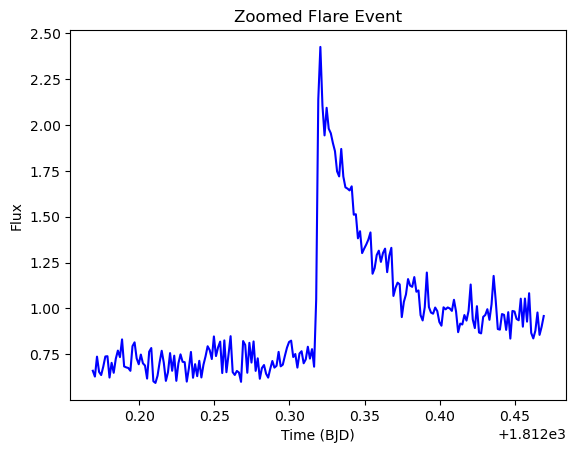

In [33]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.timeseries import TimeSeries

def find_rotation_period(tic_id):
    # Search for light curve data for the given TIC ID using SPOC pipeline
    search_result = lk.search_lightcurve('TIC ' + str(tic_id), author='SPOC')

    if len(search_result) == 0:
        raise ValueError(f"No data found for TIC {tic_id}")

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=4.5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux)
    std_flux = np.std(flux)
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]
    flare_energies = lc.flux[is_flare]

    flares = [{'tpeak': t, 'energy': e} for t, e in zip(flare_times, flare_energies)]

    return flares

def plot_light_curve(lc, flares=None):
    # Plot the light curve
    lc.plot()
    plt.title('Light Curve')
    plt.xlabel('Time (BTJD)')
    plt.ylabel('Flux')

    # Highlight flare events if provided
    if flares is not None:
        for flare in flares:
            plt.axvline(flare['tpeak'].value, color='r', linestyle='--', alpha=0.5)

    plt.show()

def plot_zoomed_flare(lc, flare_time, window_size=0.2):
    # Extract the flare region around the specified time
    t_start = flare_time - window_size/2
    t_end = flare_time + window_size/2
    flare_lc = lc[lc.time >= t_start]
    flare_lc = flare_lc[flare_lc.time <= t_end]

    # Convert time and flux to numpy arrays
    time = flare_lc.time.value
    flux = flare_lc.flux.value

    # Fold the flare light curve to the rotation period
    phase = (flare_lc.time - flare_lc.time[0]) / rotation_period % 1

    # Plot the zoomed flare
    plt.plot(time, flux, color='b')
    plt.title('Zoomed Flare Event')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')

    plt.show()

def print_key_parameters(rotation_period, flares):
    if len(flares) > 0:
        # Get the flare energy and time of the first flare
        first_flare = flares[0]
        flare_time = first_flare['tpeak']
        flare_energy = first_flare['energy']

        # Calculate the flare duration
        first_flare = flares[0]
        last_flare = flares[1]
        flare_start = first_flare['tpeak'] - 0.002
        flare_end = last_flare['tpeak'] + 0.002
        flare_duration = (flare_end - flare_start).to(u.s)  # Duration in seconds
        flare_duration_minutes = (flare_duration.to(u.min)).value  # Duration in minutes
        flare_duration_hours = (flare_duration.to(u.hour)).value  # Duration in hours

        # Print key parameters
        print("Key Parameters:")
        print(f"Rotation Period: {rotation_period:.3f} days")
        print(f"Flare Time: {flare_time.jd:.3f} (JD)")
        print(f"Flare Energy: {flare_energy:.3e} (normalized flux)")
        print(f"Flare Duration: {flare_duration:.3f} seconds ({flare_duration_minutes:.2f} minutes)")
    else:
        print("No flare events found.")

# Provide the path to the text file containing the list of TIC IDs
tic_ids_file = 'md_ids.txt'

# Read TIC IDs from the input text file
with open(tic_ids_file, 'r') as f:
    tic_ids = [line.strip() for line in f]

for tic_id in tic_ids:
    try:
        # Find rotation period and flare events for the current TIC ID
        lc, rotation_period = find_rotation_period(tic_id)
        flares = find_flare_events(lc)

        # Print key parameters for the current TIC ID
        print(f"\nTIC ID: {tic_id}")
        print_key_parameters(rotation_period, flares)

        # Plot the light curve with flare events for the current TIC ID
        plot_light_curve(lc, flares)

        # Plot a zoomed flare event (first flare in the list) for the current TIC ID
        if flares:
            flare_time = flares[0]['tpeak']
            window_size = 0.3
            plot_zoomed_flare(lc, flare_time, window_size)

    except Exception as e:
        print(f"Error while processing TIC {tic_id}: {str(e)}")
        continue
